In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn import metrics

import statsmodels.formula.api as sm
import scipy, scipy.stats
import math

from statsmodels.api import add_constant

In [33]:
dataset_sp = pd.read_csv('StudentsPerformance.csv')
dataset_sp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
dataset_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [35]:
dataset_sp.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000,NaN,NaN,NaN,66.089,15.1631,0,57,66,77,100
reading score,1000,NaN,NaN,NaN,69.169,14.6002,17,59,70,79,100
writing score,1000,NaN,NaN,NaN,68.054,15.1957,10,57.75,69,79,100


In [36]:
dataset_sp['Exam Score'] = (dataset_sp['math score'] + dataset_sp['reading score'] +dataset_sp['writing score'])/3

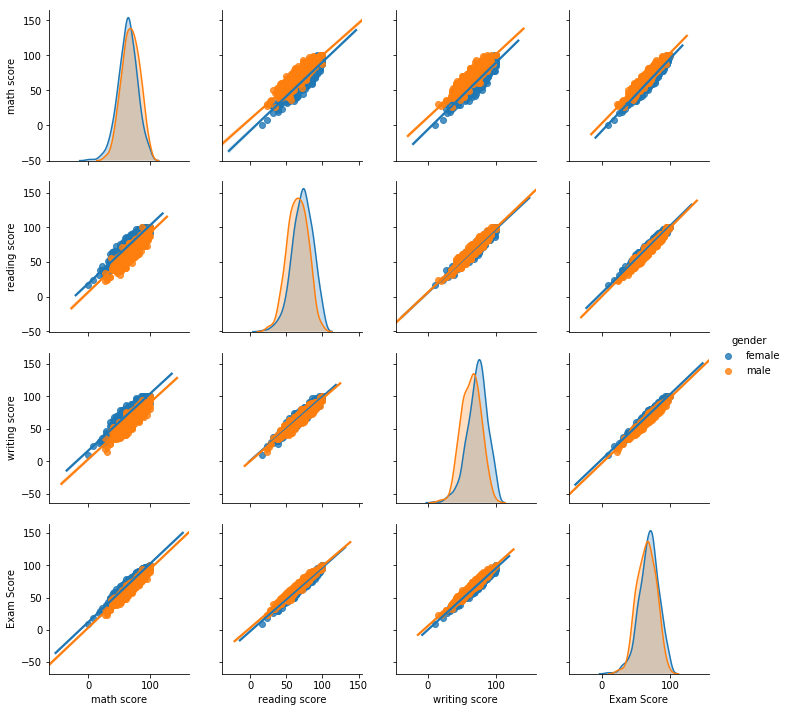

In [37]:
sns.pairplot(data=dataset_sp,diag_kind='kde', hue='gender',kind='reg')

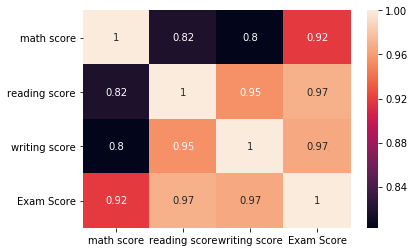

In [38]:
sns.heatmap(dataset_sp.corr(), annot=True)

In [39]:
dataset_sp.groupby(['race/ethnicity','parental level of education']).mean()

math score  reading score  \
race/ethnicity parental level of education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            writing score  Exam Score  
race/ethnicity parental level of education                             
group A        associate's degree               63.571429   63.880952  
               bachelor's degree                68.333333   67.861111  
               high school                      60.500000   61.277778  
               master's degree                  67.666667   63.333333  
               some college                     65.000000   64.888889  
               some high school                 58.583333   59.861111  
group B        associate's degree               68.243902   67.975610  
               bachelor's degree                71.650000   71.300000  
               high school                      61.250000   61.500000  
               master's degree                  77.166667   74.833333  
               some college                     64.189189   64.378378  
               some high school                 64.605263   64.289474  
group C        associate's degree               70.269231   69.376068  
               bachelor's degree                75.900000   73.241667  
               high school                      61.656250   62.328125  
               master's degree                  69.526316   69.035088  
               some college                     68.869565   67.806763  
               some high school                 63.285714   63.156463  
group D        associate's degree               69.860000   69.333333  
               bachelor's degree                71.892857   69.869048  
               high school                      63.159091   63.477273  
               master's degree                  79.

In [44]:
gender_score = dataset_sp.groupby(['gender']).mean().reset_index()
gender_score

,gender,math score,reading score,writing score,Exam Score
0,female,63.633205,72.608108,72.467181,69.569498
1,male,68.728216,65.473029,63.311203,65.837483


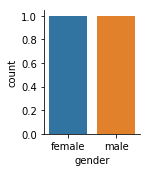

In [41]:
sns.catplot(x='gender', data=gender_score, kind="count", height=2.5, aspect=.8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


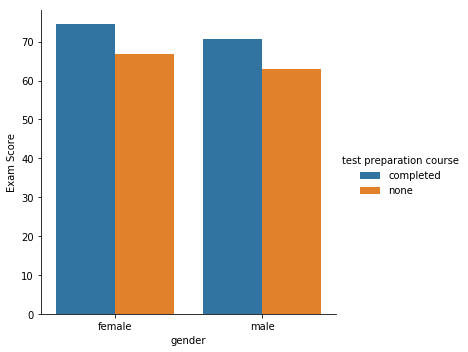

In [10]:
#Comparison between Test Prepration & Exam Score for different gender
course_gender = dataset_sp.groupby(['gender','test preparation course']).mean().reset_index()
sns.factorplot(x='gender', y='Exam Score', hue='test preparation course', data=course_gender, kind='bar')


- Person who has completed the test prepration course has score well more than those who hasn't

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


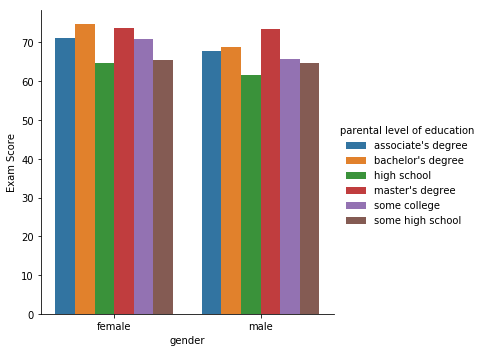

In [11]:
#Comparison between Parent Level of Education & Exam Score for different gender
course_gender = dataset_sp.groupby(['gender','parental level of education']).mean().reset_index()
sns.factorplot(x='gender', y='Exam Score', hue='parental level of education', data=course_gender, kind='bar')


- Students whose Parents having bachelor's degree and Master's degree are scored well marks

In [12]:
passing_marks = 40


In [13]:
dataset_sp['Overall Status'] = np.where(dataset_sp['Exam Score']<passing_marks,'F','P')
dataset_sp['Overall Status'].value_counts()

P    970
F     30
Name: Overall Status, dtype: int64

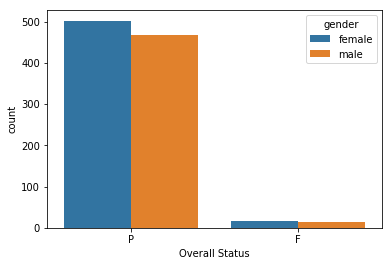

In [14]:
sns.countplot(dataset_sp['Overall Status'],hue=dataset_sp['gender'])

In [15]:
def grades(status,total):
    if status == 'F':
        return 'F'
    if total >=90:
        return 'A+'
    if total >=80:
        return 'A'
    if total >=70:
        return 'B'
    if total >=60:
        return 'C'
    if total >=50:
        return 'D'
    if total >=40:
        return 'E'

In [16]:
dataset_sp['Grade'] =dataset_sp.apply(lambda x : grades(x['Overall Status'] ,x['Exam Score']) ,axis =1)

In [17]:
dataset_sp['Grade'].value_counts()

B     261
C     256
D     182
A     146
E      73
A+     52
F      30
Name: Grade, dtype: int64

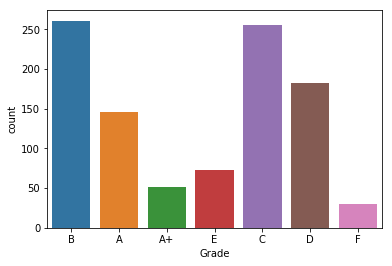

In [18]:
sns.countplot(data = dataset_sp , x = 'Grade')

In [19]:
dataset_sp.drop(['math score','reading score','writing score','Overall Status'],axis =1,inplace=True)

In [20]:
X = dataset_sp.drop('Exam Score', axis=1)
X = pd.get_dummies(X)

Y = dataset_sp['Exam Score']

In [21]:
x_train , y_train ,x_test ,y_test = train_test_split(X,Y,test_size = 0.3 ,random_state =201)

In [22]:
lr = LinearRegression()
lr.fit(x_train,x_test)
predict = lr.predict(y_train)
mse = mean_squared_error(y_test ,predict)
print("Mean Square Error: ",mse)
print("Coefficient ",lr.coef_)
print("Intercept ",lr.intercept_)

Mean Square Error:  9.50389105903
Coefficient  [  2.46765498e+14   2.46765498e+14   2.96871328e+13   2.96871328e+13
   2.96871328e+13   2.96871328e+13   2.96871328e+13  -2.44815564e+13
  -2.44815564e+13  -2.44815564e+13  -2.44815564e+13  -2.44815564e+13
  -2.44815564e+13  -1.07417714e+13  -1.07417714e+13   4.87299011e+13
   4.87299011e+13  -2.59029670e+13  -2.59029670e+13  -2.59029670e+13
  -2.59029670e+13  -2.59029670e+13  -2.59029670e+13  -2.59029670e+13]
Intercept  -2.64056236724e+14


In [23]:
rmse = np.sqrt(mse)
print("RMSE Score: ", rmse)

R2=metrics.r2_score(y_test, predict)
print("R-Squared :", R2)

RMSE Score:  3.08283814999
R-Squared : 0.952334274482


In [24]:
np.corrcoef(y_test,predict)

array([[ 1.        ,  0.97607327],
       [ 0.97607327,  1.        ]])